## Laboratory 3 - Bayesian Inference ##

# Exercise 1 #

The number of particles emitted by a radioactive source during a fixed interval of time
(∆t = 10 s) follows a Poisson distribution on the parameter µ. The number of particles
observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3. 

(a) assuming a positive uniform prior distribution for the parameter µ
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R 

Poisson likelihood for a single measurement:
$$
f(y \mid \mu)=\frac{\mu^{y} \mathrm{e}^{-\mu}}{y!}
$$

For multiple measurements:
$$
f\left(\left\{y_{j}\right\} \mid \mu\right)=\prod_{j=1}^{n} f\left(y_{j} \mid \mu\right) \quad 

In [42]:
# Load required libraries
library(ggplot2)
library(Hmisc)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


Mean 3.000000
Median 2.950000
Variance 0.521241


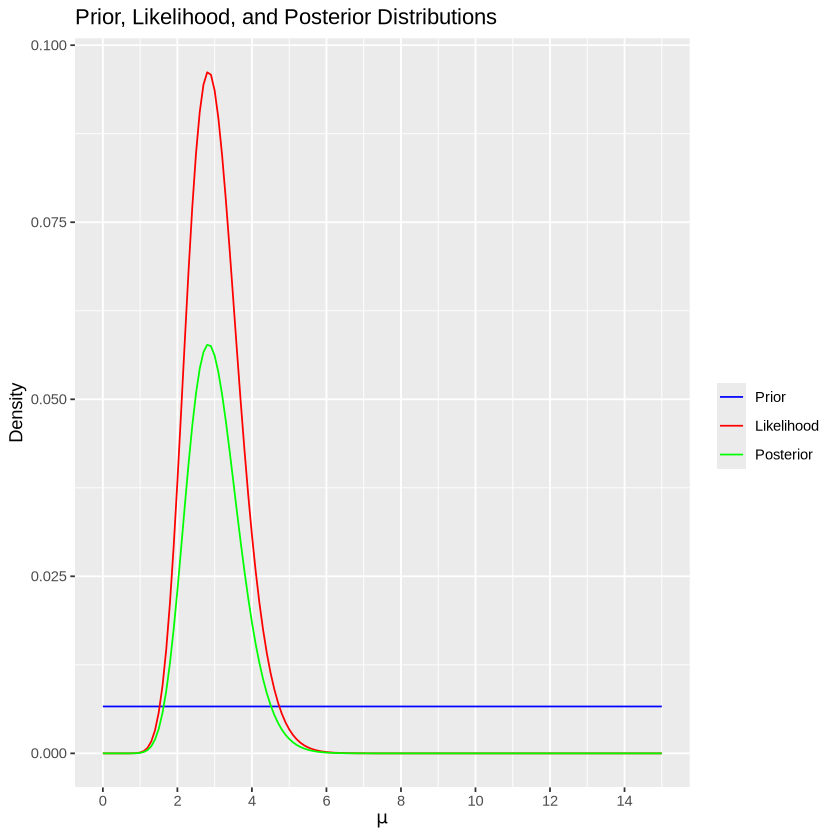

In [49]:
# Define the observed data
data = c(4, 1, 3, 1, 5, 3)
mu_values = seq(0, max(data) + 10, by = 0.1)

# Define the likelihood function for Poisson distribution
likelihood = dpois(sum(data), lambda = mu_values * length(data))

# Define the prior distribution (positive uniform)
prior = replicate(length(mu_values), 1 / length(mu_values))
#print(prior)

# Define the posterior distribution (proportional to likelihood * prior)
posterior = (likelihood * prior)

# Normalize the posterior
posterior = posterior/ sum(posterior) 

# Organize the data in a dataframe
df = data.frame(mu = mu_values, posterior = posterior, prior = prior, likelihood = likelihood)
#df
ggplot(df, aes(x = mu, y = prior)) +
      ylim(0, max(likelihood)) +
      geom_line(aes(color = 'blue')) +
      geom_line(y = likelihood, aes(color = 'green')) +
      geom_line(y = posterior, aes(color = 'red')) +
      labs(title = "Prior, Likelihood, and Posterior Distributions",
            x = expression(mu),
            y = "Density",
            color = "") +
      scale_color_manual(values = c("blue", "red", "green"), labels = c("Prior", "Likelihood", "Posterior")) +
      scale_x_continuous(breaks = seq(0, 15, 2))

# Calculate mean, median and variance analitically
mean = wtd.mean(mu_values, posterior, normwt=TRUE)
median = wtd.quantile(mu_values, posterior, probs=0.5, normwt=TRUE)
var = wtd.var(mu_values, posterior, normwt=TRUE)

cat(sprintf("Mean %f\n", mean))
cat(sprintf("Median %f\n", median))
cat(sprintf("Variance %f\n", var))

(b) assuming a Gamma prior such that the expected value is µ = 3 with a standard
deviation σ = 1,
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R. 

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


Mean 2.888889
Median 2.900000
Variance 0.338068


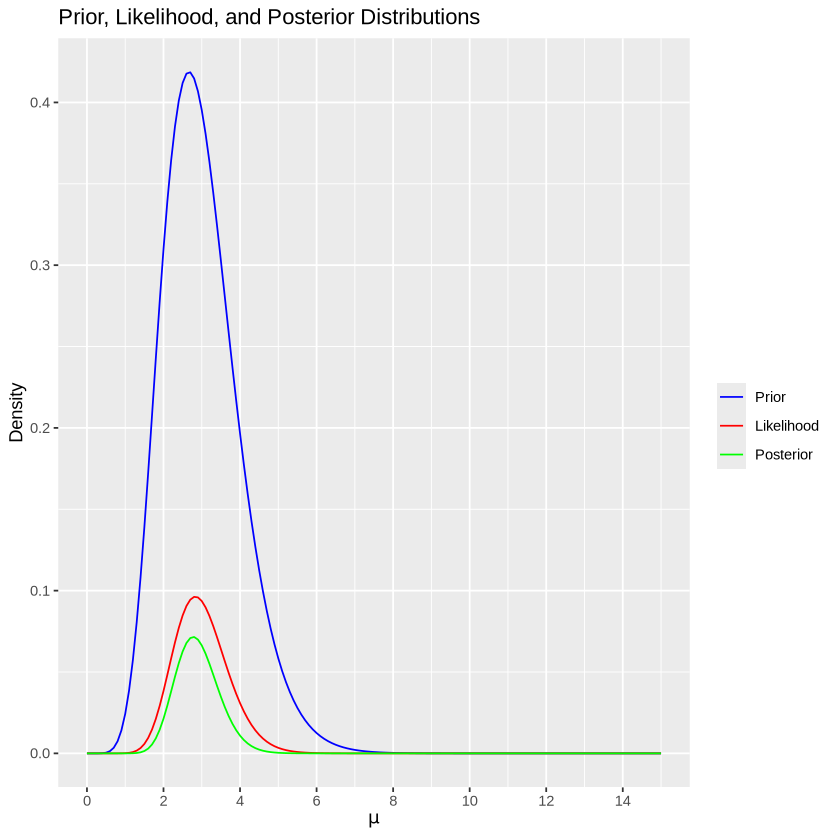

In [56]:
# Define the observed data
data = c(4, 1, 3, 1, 5, 3)
mu_values = seq(0, max(data) + 10, by = 0.1)

# Define the likelihood function for Poisson distribution
likelihood = dpois(sum(data), lambda = mu_values * length(data))

# Define the prior distribution 
prior = dgamma(mu_values, shape= 9, scale= 1/3)
#print(prior)

# Define the posterior distribution (proportional to likelihood * prior)
posterior = (likelihood * prior)

# Normalize the posterior
posterior = posterior/ sum(posterior) 

# Organize the data in a dataframe
df = data.frame(mu = mu_values, posterior = posterior, prior = prior, likelihood = likelihood)
#df
ggplot(df, aes(x = mu, y = prior)) +
      ylim(0, max(prior)) +
      geom_line(aes(color = 'blue')) +
      geom_line(y = likelihood, aes(color = 'green')) +
      geom_line(y = posterior, aes(color = 'red')) +
      labs(title = "Prior, Likelihood, and Posterior Distributions",
            x = expression(mu),
            y = "Density",
            color = "") +
      scale_color_manual(values = c("blue", "red", "green"), labels = c("Prior", "Likelihood", "Posterior")) +
      scale_x_continuous(breaks = seq(0, 15, 2))

# Calculate mean, median and variance analitically
mean = wtd.mean(mu_values, posterior, normwt=TRUE)
median = wtd.quantile(mu_values, posterior, probs=0.5, normwt=TRUE)
var = wtd.var(mu_values, posterior, normwt=TRUE)

cat(sprintf("Mean %f\n", mean))
cat(sprintf("Median %f\n", median))
cat(sprintf("Variance %f\n", var))

(c) evaluate a 95% credibility interval for the results obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior
distribution, with the same mean and standard deviation